Импортируем нужные библиотеки.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# import tensorflow as tf

In [2]:
data_may = pd.read_excel('data_may.xlsx')
data_may.columns = data_may.iloc[1]
data_may = data_may[2:]
data_may.index = pd.RangeIndex(857)
del data_may[data_may.columns[22]]
data_may = data_may.drop(columns=[f'Кол-во НЛЗ {t} ручей' for t in range(1, 7)])


data_july_sept = pd.read_excel('data_july-sep.xlsx')
data_july_sept.columns = data_july_sept.iloc[1]
data_july_sept = data_july_sept[2:]
data_july_sept.index = pd.RangeIndex(2881)
del data_july_sept[data_july_sept.columns[22]]
data_july_sept = data_july_sept.drop(columns=[f'Кол-во НЛЗ {t} ручей' for t in range(1, 7)])


data_june = pd.read_excel('data_june.xlsx')
data_june.columns = data_june.iloc[1]
data_june = data_june[2:]
data_june.index = pd.RangeIndex(650)
del data_june[data_june.columns[22]]
data_june = data_june.drop(columns=['Кол-во заготовок', 'B, %'])

data =  data_june.merge(data_may.merge(data_july_sept, how='outer'), how='outer')
data['data'] = data['Дата'].copy()
for i in range(len(data['Дата'])):
    data.loc[i, 'Дата'] = pd.to_datetime(data.loc[i, 'Дата'], format='%d.%m.%Y')
data['Плавка в серии'] = data['Плавка в серии'].astype('float')
data = data.sort_values(by='Плавка в серии', kind='mergesort')
data = data.sort_values(by='Паспорт разливки плавки', kind='mergesort')
data = data.sort_values(by='Дата', kind='mergesort')
data

1,№ п/п,Паспорт разливки плавки,Дата,"Вес заготовок, т",Марка стали полученная,ГОСТ,Плавка в серии,Сечение заготовки,Тип разливки,"Вес стали (со стенда ППС), т",...,"Sb, %","Mg, %","Zn, %","Сэ, %",Тип защитной трубы,Тип погружного стакана,Тип стакана дозатора п/к,Тип стопора п/к,Замечания по плавке,data
668,1,12002878,2020-05-01 00:00:00,"163,8",Арм240,ГОСТ 34028-2016,5.0,150x150,Открытая,NaN,...,NaN,NaN,NaN,NaN,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN,01.05.2020
650,2,12002879,2020-05-01 00:00:00,"170,188",Арм240,ГОСТ 34028-2016,6.0,150x150,Открытая,NaN,...,NaN,NaN,NaN,NaN,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN,01.05.2020
822,5,12002880,2020-05-01 00:00:00,"159,6",Арм240,ГОСТ 34028-2016,1.0,150x150,Открытая,NaN,...,NaN,NaN,NaN,NaN,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN,01.05.2020
821,3,12002881,2020-05-01 00:00:00,"157,449",Арм240,ГОСТ 34028-2016,1.0,150x150,Закрытая,NaN,...,NaN,NaN,NaN,NaN,RHI DELTEK D99,RHI DELTEK D99Z98,RHI DELTEK D99WX08,RHI DELTEK A100WX08,1 ручей Отказ привода стопора.,01.05.2020
669,4,12002882,2020-05-01 00:00:00,"107,428",Арм240,ГОСТ 34028-2016,2.0,150x150,Закрытая,NaN,...,NaN,NaN,NaN,NaN,RHI DELTEK D99,RHI DELTEK D99Z98,RHI DELTEK D99WX08,RHI DELTEK A100WX08,"Загорелся МГР 6 ручей,Срыв серии (потухли МГР ...",01.05.2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,2877,12007491,2020-10-01 00:00:00,"160,368",Арм500,ГОСТ 34028-2016,2.0,180x180,Открытая,NaN,...,NaN,0.0001,NaN,NaN,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN,01.10.2020
4384,2878,12007492,2020-10-01 00:00:00,"166,536",Арм500,ГОСТ 34028-2016,3.0,180x180,Открытая,NaN,...,NaN,0.0001,NaN,NaN,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN,01.10.2020
4385,2879,12007493,2020-10-02 00:00:00,"160,368",Арм500,ГОСТ 34028-2016,4.0,180x180,Открытая,NaN,...,NaN,NaN,NaN,NaN,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN,02.10.2020
4386,2880,12007494,2020-10-02 00:00:00,"166,536",Арм500,ГОСТ 34028-2016,5.0,180x180,Открытая,NaN,...,NaN,NaN,NaN,NaN,RHI DELTEK D99,NaN,RHI JUSTAL DS1015,NaN,NaN,02.10.2020


In [3]:
i = 0
for column in data.columns:
    i += 1
    print(i*100//len(data.columns), end=' ')
    if data[column].dtypes == np.float64:
        continue
    try:
        data[column] = data[column].astype('float')
    except TypeError:
        continue
    except ValueError:
        # print('First', column)
        for index in range(len(data)):
            if data.loc[index, column] is np.nan:
                data.loc[index, column] = '0'
            data.loc[index, column] = data.loc[index, column].replace(',', '.')
        try:
            data[column] = data[column].astype('float')
        except ValueError:
            pass
                    # print('Second', column)
data.dtypes.values

1 2 4 5 7 8 9 11 12 14 15 16 18 19 21 22 23 25 26 28 29 30 32 33 35 36 38 39 40 42 43 45 46 47 49 50 52 53 54 56 57 59 60 61 63 64 66 67 69 70 71 73 74 76 77 78 80 81 83 84 85 87 88 90 91 92 94 95 97 98 100 

array([dtype('float64'), dtype('float64'), dtype('O'), dtype('float64'),
       dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('O'), dtype('float64'), dtype('O'),
       dtype('float64'), dtype('O'), dtype('float64'), dtype('O'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype(

In [4]:
data

1,№ п/п,Паспорт разливки плавки,Дата,"Вес заготовок, т",Марка стали полученная,ГОСТ,Плавка в серии,Сечение заготовки,Тип разливки,"Вес стали (со стенда ППС), т",...,"Sb, %","Mg, %","Zn, %","Сэ, %",Тип защитной трубы,Тип погружного стакана,Тип стакана дозатора п/к,Тип стопора п/к,Замечания по плавке,data
668,1.0,12002878.0,2020-05-01 00:00:00,163.800,Арм240,ГОСТ 34028-2016,5.0,150x150,Открытая,NaN,...,NaN,NaN,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0,01.05.2020
650,2.0,12002879.0,2020-05-01 00:00:00,170.188,Арм240,ГОСТ 34028-2016,6.0,150x150,Открытая,NaN,...,NaN,NaN,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0,01.05.2020
822,5.0,12002880.0,2020-05-01 00:00:00,159.600,Арм240,ГОСТ 34028-2016,1.0,150x150,Открытая,NaN,...,NaN,NaN,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0,01.05.2020
821,3.0,12002881.0,2020-05-01 00:00:00,157.449,Арм240,ГОСТ 34028-2016,1.0,150x150,Закрытая,NaN,...,NaN,NaN,NaN,NaN,RHI DELTEK D99,RHI DELTEK D99Z98,RHI DELTEK D99WX08,RHI DELTEK A100WX08,1 ручей Отказ привода стопора.,01.05.2020
669,4.0,12002882.0,2020-05-01 00:00:00,107.428,Арм240,ГОСТ 34028-2016,2.0,150x150,Закрытая,NaN,...,NaN,NaN,NaN,NaN,RHI DELTEK D99,RHI DELTEK D99Z98,RHI DELTEK D99WX08,RHI DELTEK A100WX08,Загорелся МГР 6 ручей.Срыв серии (потухли МГР ...,01.05.2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,2877.0,12007491.0,2020-10-01 00:00:00,160.368,Арм500,ГОСТ 34028-2016,2.0,180x180,Открытая,NaN,...,NaN,0.0001,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0,01.10.2020
4384,2878.0,12007492.0,2020-10-01 00:00:00,166.536,Арм500,ГОСТ 34028-2016,3.0,180x180,Открытая,NaN,...,NaN,0.0001,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0,01.10.2020
4385,2879.0,12007493.0,2020-10-02 00:00:00,160.368,Арм500,ГОСТ 34028-2016,4.0,180x180,Открытая,NaN,...,NaN,NaN,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0,02.10.2020
4386,2880.0,12007494.0,2020-10-02 00:00:00,166.536,Арм500,ГОСТ 34028-2016,5.0,180x180,Открытая,NaN,...,NaN,NaN,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0,02.10.2020


In [5]:
data_copy = data.copy()

In [6]:
data_copy.index = pd.RangeIndex(4388)
data_copy

1,№ п/п,Паспорт разливки плавки,Дата,"Вес заготовок, т",Марка стали полученная,ГОСТ,Плавка в серии,Сечение заготовки,Тип разливки,"Вес стали (со стенда ППС), т",...,"Sb, %","Mg, %","Zn, %","Сэ, %",Тип защитной трубы,Тип погружного стакана,Тип стакана дозатора п/к,Тип стопора п/к,Замечания по плавке,data
0,1.0,12002878.0,2020-05-01 00:00:00,163.800,Арм240,ГОСТ 34028-2016,5.0,150x150,Открытая,NaN,...,NaN,NaN,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0,01.05.2020
1,2.0,12002879.0,2020-05-01 00:00:00,170.188,Арм240,ГОСТ 34028-2016,6.0,150x150,Открытая,NaN,...,NaN,NaN,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0,01.05.2020
2,5.0,12002880.0,2020-05-01 00:00:00,159.600,Арм240,ГОСТ 34028-2016,1.0,150x150,Открытая,NaN,...,NaN,NaN,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0,01.05.2020
3,3.0,12002881.0,2020-05-01 00:00:00,157.449,Арм240,ГОСТ 34028-2016,1.0,150x150,Закрытая,NaN,...,NaN,NaN,NaN,NaN,RHI DELTEK D99,RHI DELTEK D99Z98,RHI DELTEK D99WX08,RHI DELTEK A100WX08,1 ручей Отказ привода стопора.,01.05.2020
4,4.0,12002882.0,2020-05-01 00:00:00,107.428,Арм240,ГОСТ 34028-2016,2.0,150x150,Закрытая,NaN,...,NaN,NaN,NaN,NaN,RHI DELTEK D99,RHI DELTEK D99Z98,RHI DELTEK D99WX08,RHI DELTEK A100WX08,Загорелся МГР 6 ручей.Срыв серии (потухли МГР ...,01.05.2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,2877.0,12007491.0,2020-10-01 00:00:00,160.368,Арм500,ГОСТ 34028-2016,2.0,180x180,Открытая,NaN,...,NaN,0.0001,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0,01.10.2020
4384,2878.0,12007492.0,2020-10-01 00:00:00,166.536,Арм500,ГОСТ 34028-2016,3.0,180x180,Открытая,NaN,...,NaN,0.0001,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0,01.10.2020
4385,2879.0,12007493.0,2020-10-02 00:00:00,160.368,Арм500,ГОСТ 34028-2016,4.0,180x180,Открытая,NaN,...,NaN,NaN,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0,02.10.2020
4386,2880.0,12007494.0,2020-10-02 00:00:00,166.536,Арм500,ГОСТ 34028-2016,5.0,180x180,Открытая,NaN,...,NaN,NaN,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0,02.10.2020


In [7]:
data_copy.fillna(0, inplace=True)
data_copy.loc[data_copy['Тип разливки'] == 'Закрытая', 'Тип разливки'] = 1
data_copy.loc[data_copy['Тип разливки'] == 'Открытая', 'Тип разливки'] = 0
data_copy = data_copy.drop(data_copy.loc[data_copy['Сечение заготовки'] == '150x150', 'Сечение заготовки'].index)
data_copy.loc[data_copy['Сечение заготовки'] == '180x180', 'Сечение заготовки'] = 180
data_copy.loc[:, 'Сечение заготовки'] = data_copy['Сечение заготовки'].astype('float')
data_copy.loc[:, 'Тип разливки'] = data_copy['Тип разливки'].astype('float')
data_copy.dtypes.values

array([dtype('float64'), dtype('float64'), dtype('<M8[ns]'),
       dtype('float64'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
       dtype('float64'), dtype('O'), dtype('float64'), dtype('O'),
       dtype('float64'), dtype('O'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype(

In [8]:
collet_180 = pd.read_csv('gilzs.csv', encoding='ANSI', sep=';')
collet_180

,Unnamed: 0,Установка,Unnamed: 2,Unnamed: 3,1 ревизия,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88
0,№ гильзы,Дата ввода,№ кристаллизатора,№ ручья,Дата установки,Дата вывода,Причина,"стойкость, т",Зазор по шаблону,R1,...,"стойкость, т",Зазор по шаблону,R1,r1,Левый,Правый,Замечания,NaN,NaN,NaN
1,30013869,26.12.2019,7,5,30.12.2019,04.01.2020,смена сечения,3961,0;5,0;5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30014134,16.03.2020,7,1,27.04.2020,29.04.2020,смена сечения,1420,0;4,0;4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30013874,29.05.2020,7,2,31.05.2020,02.06.2020,смена сечения,1641,0;4,0;4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30014817,30.06.2020,7,1,02.07.2020,06.07.2020,ревизия,3380,0;4,0;4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,30013872,19.05.2020,18,6,22.05.2020,25.05.2020,смена сечения,2270,0;4,0;4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,30013876,27.05.2020,18,6,27.05.2020,30.05.2020,прорыв,2256,0;4,0;4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,30014809,29.06.2020,18,6,30.06.2020,05.07.2020,ревизия,3525,0;4,0;4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,30014825,26.07.2020,18,5,26.07.2020,29.07.2020,ревизия,2891,0;4,0;4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
columns_180 = collet_180.iloc[0][4:16]
collet_180 = collet_180.drop(0).dropna(axis='columns', how='all')
collet_list = [pd.DataFrame() for _ in range(5)]
for i in range(4, len(collet_180.columns), 12):
    for j in range(12):
        try:
            collet_list[(i-4)//12][columns_180[j]] = collet_180[collet_180.columns[i+j]]
            # print(collet_180.columns[i+j])
        except:
            pass

1 ревизия         Дата установки
Unnamed: 5           Дата вывода
Unnamed: 6               Причина
Unnamed: 7          стойкость, т
Unnamed: 8      Зазор по шаблону
Unnamed: 9                    R1
Unnamed: 10                   r1
Unnamed: 11                Левый
Unnamed: 12               Правый
Unnamed: 13            Замечания
Unnamed: 14    № кристаллизатора
Unnamed: 15              № ручья
Name: 0, dtype: object


In [21]:
index_collet = collet_180[collet_180.columns[0]]
collet_index = pd.Series(pd.RangeIndex(1, len(index_collet)+1), index=index_collet)
collet_index

Unnamed: 0
30013869     1
30014134     2
30013874     3
30014817     4
30014812     5
            ..
30013872    57
30013876    58
30014809    59
30014825    60
30014818    61
Length: 61, dtype: int64

In [11]:
for i in range(5):
    collet_list[i]['№ ручья'] = collet_list[i]['№ ручья'].astype('float')
    collet_list[i]['стойкость, т'] = collet_list[i]['стойкость, т'].astype('float')

In [12]:
fusions_collet = {}

for j in range(5):
    for i in range(1, 62):
        data_vivoda = collet_list[j].loc[i, 'Дата вывода']
        n_ruchya = collet_list[j].loc[i, '№ ручья']
        stoika = collet_list[j].loc[i, 'стойкость, т']
        if data_vivoda is np.NaN or n_ruchya is np.NaN or stoika is np.NaN:
            continue
        #print(pd.to_datetime('01.05.2020', format='%d.%m.%Y').month)
        if not (pd.to_datetime('01.05.2020', format='%d.%m.%Y') <= pd.to_datetime(data_vivoda, format='%d.%m.%Y') <= pd.to_datetime('31.05.2020', format='%d.%m.%Y')\
            or pd.to_datetime('09.06.2020', format='%d.%m.%Y') <= pd.to_datetime(data_vivoda, format='%d.%m.%Y') <= pd.to_datetime('01.10.2020', format='%d.%m.%Y')):
            continue
        #print(data_vivoda)
        try:
            n_ruchya = int(n_ruchya)
        except ValueError:
            continue
        if n_ruchya == 7:
            continue
        #print(i, j)
        #print(data_vivoda, stoika, n_ruchya)
        dat = data_copy[(data_copy['data'] == data_vivoda) & 
                          (data_copy[f'Стойкость гильзы кр-ра {n_ruchya}, т'] == stoika)]

        if len(dat) == 1:
            seria = []
            numer_collet = index_collet[i]
            numer_fuse = dat.index[0]
            if numer_collet not in fusions_collet:
                fusions_collet[numer_collet] = []
            while data_copy.loc[numer_fuse, 'Плавка в серии'] != 1:
                seria.append((data_copy.loc[numer_fuse, 'Паспорт разливки плавки'], n_ruchya))
                numer_fuse -= 1
            seria.append((data_copy.loc[numer_fuse, 'Паспорт разливки плавки'], n_ruchya))
            fusions_collet[numer_collet].extend(seria[::-1])
            
        #with pd.option_context('display.max_rows', None,'display.max_columns', None):
            #display(dat)
        #print(len(dat))

fusions_collet

{'30014817': [(12004737.0, 1),
  (12004738.0, 1),
  (12004739.0, 1),
  (12004740.0, 1),
  (12004741.0, 1),
  (12004742.0, 1),
  (12004743.0, 1),
  (12004744.0, 1),
  (12004745.0, 1),
  (12004746.0, 1),
  (12004747.0, 1),
  (12004748.0, 1),
  (12004749.0, 1),
  (12004750.0, 1),
  (12004751.0, 1),
  (12004752.0, 1),
  (12004753.0, 1),
  (12004754.0, 1),
  (12004755.0, 1),
  (12004756.0, 1),
  (12004757.0, 1),
  (12004758.0, 1),
  (12004759.0, 1),
  (12004760.0, 1),
  (12004761.0, 1),
  (12004762.0, 1),
  (12004763.0, 1),
  (12004764.0, 1),
  (12004765.0, 1),
  (12004766.0, 1),
  (12004767.0, 1),
  (12004768.0, 1),
  (12004769.0, 1),
  (12004770.0, 1),
  (12004771.0, 1),
  (12004772.0, 1),
  (12004773.0, 1),
  (12004774.0, 1),
  (12004775.0, 1),
  (12004776.0, 1),
  (12005202.0, 1),
  (12005203.0, 1),
  (12005204.0, 1),
  (12005205.0, 1),
  (12005206.0, 1),
  (12005207.0, 1),
  (12005208.0, 1),
  (12005209.0, 1),
  (12005210.0, 1),
  (12005211.0, 1),
  (12005212.0, 1),
  (12005213.0, 1),


In [13]:
len(fusions_collet)
k = 0
for i in fusions_collet:
    k += len(fusions_collet[i])
k

1488

In [38]:
stoik_col = {col: 0 for col in fusions_collet}
for col in stoik_col:
    last = 0
    for plav in fusions_collet[col]:
        stoik_col[col] += data_copy[data_copy['Паспорт разливки плавки'] == plav[0]][f'Стойкость гильзы кр-ра {plav[1]}, т'].iloc[0]
        last = data_copy[data_copy['Паспорт разливки плавки'] == plav[0]][f'Стойкость гильзы кр-ра {plav[1]}, т'].iloc[0]
    stoik_col[col] = last
for r in stoik_col:
    print(r, stoik_col[r])

30014817 10364.0
30014142 3379.0
83895 5082.0
30014811 5759.0
30014808 9859.0
30014804 10508.0
30014821 3104.0
83894 5032.0
30014815 8571.0
30013875 2252.0
30013871 2252.0
30014820 3990.0
30014138 574.0
83896 8597.0
530314 К 2492.0
30014809 10654.0
30014134 3252.0
30014810 11537.0
30013359 3112.0
30014144 4884.0
30014143 7307.0
30014824 6096.0
30014803 8981.0
30013363 3140.0
30014816 4139.0
30013874 7697.0
30014141 4519.0
30014807 10347.0


In [ ]:
stoik_col = {col: 0 for col in fusions_collet}
for col in stoik_col:
    last = 0
    for plav in fusions_collet[col]:
        for c in data_copy.clumns":
        stoik_col[col] += data_copy[data_copy['Паспорт разливки плавки'] == plav[0]][f'Вес стали расчет., т'].iloc[0]
        last = data_copy[data_copy['Паспорт разливки плавки'] == plav[0]][f'Вес стали расчет., т'].iloc[0]
stoik_col[col] += last
for r in stoik_col:
    print(r, stoik_col[r])

In [42]:
collet_list[0]

,Дата установки,Дата вывода,Причина,"стойкость, т",Зазор по шаблону,R1,r1,Левый,Правый,Замечания,№ кристаллизатора,№ ручья
1,2019-12-30 00:00:00,2020-01-04 00:00:00,смена сечения,3961,0.5,0.5,0.5,0.5,0.5,ромб до 15,7,2
2,2020-04-27 00:00:00,2020-04-29 00:00:00,смена сечения,1420,0.4,0.4,0.4,0.4,0.4,NaN,7,1
3,2020-05-31 00:00:00,2020-06-02 00:00:00,смена сечения,1641,0.4,0.4,0.4,0.4,0.4,NaN,7,2
4,2020-07-02 00:00:00,2020-07-06 00:00:00,ревизия,3380,0.4,0.4,0.4,0.4,0.4,NaN,7,1
5,2020-08-04 00:00:00,2020-08-07 00:00:00,ревизия,2770,0.4,0.4,0.4,0.4,0.4,NaN,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...
57,2020-05-22 00:00:00,2020-05-25 00:00:00,смена сечения,2270,0.4,0.4,0.4,0.4,0.4,NaN,18,NaN
58,2020-05-27 00:00:00,2020-05-30 00:00:00,прорыв,2256,0.4,0.4,0.4,0.4,0.4,NaN,18,1
59,2020-06-30 00:00:00,2020-07-05 00:00:00,ревизия,3525,0.4,0.4,0.4,0.4,0.4,NaN,18,6
60,2020-07-26 00:00:00,2020-07-29 00:00:00,ревизия,2891,0.4,0.4,0.4,0.4,0.4,NaN,18,6


In [28]:
collet_180_list[4]

,Дата установки,Дата вывода,Причина,"стойкость, т",Зазор по шаблону,R1,r1,Левый,Правый,Замечания,№ кристаллизатора,№ ручья
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-05-22 00:00:00,2020-05-25 00:00:00,смена сечения,10370,0.4,0.4,0.4,0.4,0.4,ромб 14 мм,NaN,NaN
3,2020-06-26 00:00:00,2020-06-29 00:00:00,ревизия,12615,0.4,0.4,0.4,0.4,0.4,NaN,NaN,NaN
4,2020-07-29 00:00:00,2020-07-31 00:00:00,ромб 18,11734,0.4,0.4,0.4,0.4,0.4,NaN,NaN,NaN
5,2020-08-24 00:00:00,2020-08-26 00:00:00,ревизия,13091,0.4,0.4,0.4,0.4,0.4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
with pd.option_context('display.max_rows', None,'display.max_columns', None):
    display(data_copy.loc[data_copy['Дата'] == pd.to_datetime('04/05/2020')])

1,№ п/п,Паспорт разливки плавки,Дата,"Вес заготовок, т",Марка стали полученная,ГОСТ,Плавка в серии,Сечение заготовки,Тип разливки,"Вес стали (со стенда ППС), т","Вес стали расчет., т","Вес шлака при закрытии с/к, т","Остаток металла в с/к, т","Вес разлитой стали, т","Остатки в п/к, т","Тех. обрезь, т",№ с/к,"Темп. стали в с/к, °C",№ п/к,"Стойкость гильзы кр-ра 1, т","Стойкость гильзы кр-ра 2, т","Стойкость гильзы кр-ра 3, т","Стойкость гильзы кр-ра 4, т","Стойкость гильзы кр-ра 5, т","Стойкость гильзы кр-ра 6, т","Частота качания, кол-во/мин","Ход кр-ра, мм","Скорость разливки, м/мин","Расход воды на кр-р, л/мин","Дельта температуры воды, °C","Расход воды ЗВО №1, л/мин","Расход воды ЗВО №2, л/мин","Расход воды ЗВО №3, л/мин","Брак всего, кг",Марка,"Кол-во, т",Время 1 замера,"Темп 1, °С",Время 2 замера,"Темп 2, °С",Время пробы МНЛЗ,"C, %","Si, %","Mn,%","S, %","P, %","Cr, %","Ni, %","Cu, %","As, %","Mo, %","Nb, %","Sn, %","Ti, %","V, %","Al, %","Ca, %","N, %","W, %","Bi, %","Pb, %","Sb, %","Mg, %","Zn, %","Сэ, %",Тип защитной трубы,Тип погружного стакана,Тип стакана дозатора п/к,Тип стопора п/к,Замечания по плавке
679,75.0,12002952.0,2020-04-05,163.296,Арм500,ГОСТ 34028-2016,36.0,180.0,0.0,0.0,163.696,1.8,0.4,163.296,0.0,0.0,12.0,1568.0,1.0,2801.0,2635.0,2798.0,2498.0,2671.0,1367.0,180.0,11.0,2.0,2155.0,9.0,290.0,320.0,100.0,0.0,0,0.00,2020-10-24 03:43:00,1545.0,2020-10-24 03:43:00,1545.0,2020-10-24 03:53:01,0.1862,0.1915,0.6997,0.0051,0.0093,0.0546,0.0225,0.0296,0.0016,0.0023,0.0007,0.0006,0.0008,0.0024,0.0027,0.0006,0.0064,0.0,0.0,0.0,0.0,0.0,0.0,0.318,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0
680,77.0,12002954.0,2020-04-05,163.296,Арм500,ГОСТ 34028-2016,38.0,180.0,0.0,0.0,163.696,1.8,0.4,163.296,0.0,0.0,2.0,1571.0,1.0,2859.0,2692.0,2856.0,2543.0,2726.0,1421.0,180.0,11.0,2.0,2155.0,9.0,290.0,320.0,100.0,0.0,0,0.00,2020-10-24 05:15:00,1544.0,2020-10-24 05:15:00,1544.0,2020-10-24 05:32:48,0.2010,0.1862,0.7002,0.0029,0.0107,0.0495,0.0197,0.0294,0.0014,0.0024,0.0007,0.0007,0.0008,0.0028,0.0030,0.0012,0.0046,0.0,0.0,0.0,0.0,0.0,0.0,0.332,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0
681,84.0,12002961.0,2020-04-05,166.320,25Г2С,ГОСТ 5781-82,2.0,180.0,0.0,0.0,166.720,1.8,0.4,166.320,0.0,0.0,5.0,1585.0,2.0,3055.0,2892.0,3061.0,2716.0,2922.0,1612.0,180.0,7.0,2.0,2155.0,9.0,210.0,230.0,75.0,0.0,B 789/BC,0.02,2020-10-24 11:52:00,1536.0,2020-10-24 11:52:00,1534.0,2020-10-24 12:03:14,0.2733,0.5673,1.5174,0.0025,0.0127,0.0461,0.0183,0.0389,0.0014,0.0019,0.0009,0.0011,0.0022,0.0055,0.0042,0.0007,0.0055,0.0,0.0,0.0,0.0,0.0,0.0,0.583,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0
682,86.0,12002963.0,2020-04-05,166.320,25Г2С,ГОСТ 5781-82,4.0,180.0,0.0,0.0,166.720,1.8,0.4,166.320,0.0,0.0,2.0,1559.0,2.0,3106.0,2946.0,3122.0,2773.0,2976.0,1669.0,180.0,7.0,2.0,2155.0,9.0,210.0,230.0,75.0,0.0,B 789/BC,0.02,2020-10-24 13:37:00,1531.0,2020-10-24 13:37:00,1531.0,2020-10-24 13:57:07,0.2818,0.5847,1.5312,0.0023,0.0144,0.0465,0.0194,0.0327,0.0016,0.0028,0.0009,0.0009,0.0022,0.0055,0.0045,0.0007,0.0070,0.0,0.0,0.0,0.0,0.0,0.0,0.595,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0
683,91.0,12002968.0,2020-04-05,163.296,25Г2С,ГОСТ 5781-82,9.0,180.0,0.0,0.0,163.696,1.8,0.4,163.296,0.0,0.0,2.0,1558.0,2.0,3230.0,3085.0,3267.0,2918.0,3112.0,1805.0,180.0,7.0,2.0,2155.0,9.0,210.0,230.0,75.0,0.0,B 789/BC,0.02,2020-10-24 17:50:00,1532.0,2020-10-24 17:50:00,1529.0,2020-10-24 18:04:42,0.2675,0.5693,1.5266,0.0031,0.0092,0.0484,0.0241,0.0371,0.0015,0.0048,0.0008,0.0014,0.0023,0.0052,0.0040,0.0009,0.0056,0.0,0.0,0.0,0.0,0.0,0.0,0.579,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0
694,74.0,12002951.0,2020-04-05,160.272,Арм500,ГОСТ 34028-2016,35.0,180.0,0.0,0.0,160.672,1.8,0.4,160.272,0.0,0.0,4.0,1567.0,1.0,2771.0,2608.0,2768.0,2477.0,2644.0,1340.0,180.0,11.0,2.0,2155.0,9.0,290.0,320.0,100.0,0.0,0,0.00,2020-10-24 02:54:00,1547.0,2020-10-24 02:54:00,1546.0,2020-10-24 03:05:45,0.1871,0.1764,0.7079,0.0022,0.0115,0.0547,0.0228,0.0334,0.0016,0.0026,0.0007,0.0006,0.0008,0.0026,0.0039,0.0006,0.0035,0.0,0.0,0.0,0.0

In [18]:
collet_180 = pd.read_excel('gilzs.xlsx', sheet_name='180')
collet_180.columns = collet_180.iloc[0]
collet_180 = collet_180[1:]
collet_180.index = pd.RangeIndex(61)
collet_180

,№ гильзы,Дата ввода,№ кристаллизатора,№ ручья,Дата установки,Дата вывода,Причина,"стойкость, т",Зазор по шаблону,R1,...,Дата установки,Дата вывода,Причина,"стойкость, т",Зазор по шаблону,R1,r1,Левый,Правый,Замечания
0,30013869,2019-12-26 00:00:00,7,5,2019-12-30 00:00:00,2020-01-04 00:00:00,смена сечения,3961,0.5,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30014134,2020-03-16 00:00:00,7,1,2020-04-27 00:00:00,2020-04-29 00:00:00,смена сечения,1420,0.4,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30013874,2020-05-29 00:00:00,7,2,2020-05-31 00:00:00,2020-06-02 00:00:00,смена сечения,1641,0.4,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30014817,2020-06-30 00:00:00,7,1,2020-07-02 00:00:00,2020-07-06 00:00:00,ревизия,3380,0.4,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30014812,2020-08-01 00:00:00,7,1,2020-08-04 00:00:00,2020-08-07 00:00:00,ревизия,2770,0.4,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,30013872,2020-05-19 00:00:00,18,6,2020-05-22 00:00:00,2020-05-25 00:00:00,смена сечения,2270,0.4,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,30013876,2020-05-27 00:00:00,18,6,2020-05-27 00:00:00,2020-05-30 00:00:00,прорыв,2256,0.4,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,30014809,2020-06-29 00:00:00,18,6,2020-06-30 00:00:00,2020-07-05 00:00:00,ревизия,3525,0.4,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,30014825,2020-07-26 00:00:00,18,5,2020-07-26 00:00:00,2020-07-29 00:00:00,ревизия,2891,0.4,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
collet_180.merge(collet_150, how='outer')

MergeError: Data columns not unique: Index(['№ гильзы', 'Дата ввода ', '№ кристаллизатора', '№ ручья',
       'Дата установки', 'Дата вывода', 'Причина', 'стойкость, т',
       'Зазор по шаблону', 'R1', 'r1', 'Левый', 'Правый', 'Замечания',
       '№ кристаллизатора', '№ ручья', 'Дата установки', 'Дата вывода',
       'Причина', 'стойкость, т', 'Зазор по шаблону', 'R1', 'r1', 'Левый',
       'Правый', 'Замечания', '№ кристаллизатора', '№ ручья', 'Дата установки',
       'Дата вывода', 'Причина', 'стойкость, т', 'Зазор по шаблону', 'R1',
       'r1', 'Левый', 'Правый', 'Замечания', '№ кристаллизатора', '№ ручья',
       'Дата установки', 'Дата вывода', 'Причина', 'стойкость, т',
       'Зазор по шаблону', 'R1', 'r1', 'Левый', 'Правый', 'Замечания',
       '№ кристаллизатора', '№ ручья', 'Дата установки', 'Дата вывода',
       'Причина', 'стойкость, т', 'Зазор по шаблону', 'R1', 'r1', 'Левый',
       'Правый', 'Замечания', '№ кристаллизатора', '№ ручья', 'Дата установки',
       'Дата вывода', 'Причина', 'стойкость, т', 'Зазор по шаблону', 'R1',
       'r1', 'Левый', 'Правый', 'Замечания', '№ кристаллизатора', '№ ручья',
       'Дата установки', 'Дата вывода', 'Причина', 'стойкость, т',
       'Зазор по шаблону', 'R1', 'r1', 'Левый', 'Правый', 'Замечания'],
      dtype='object', name=0)

In [22]:
collet_180.columns == collet_150.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [19]:
with pd.option_context('display.max_rows', None,'display.max_columns', None):
    display(data_copy.describe())

1,Номер гильзы,Паспорт разливки плавки,"Вес заготовок, т",Плавка в серии,"Вес стали (со стенда ППС), т","Вес стали расчет., т","Вес шлака при закрытии с/к, т","Остаток металла в с/к, т","Вес разлитой стали, т","Остатки в п/к, т","Тех. обрезь, т",№ с/к,"Темп. стали в с/к, °C",№ п/к,"Стойкость гильзы кр-ра 1, т","Стойкость гильзы кр-ра 2, т","Стойкость гильзы кр-ра 3, т","Стойкость гильзы кр-ра 4, т","Стойкость гильзы кр-ра 5, т","Стойкость гильзы кр-ра 6, т","Частота качания, кол-во/мин","Ход кр-ра, мм","Скорость разливки, м/мин","Расход воды на кр-р, л/мин","Дельта температуры воды, °C","Расход воды ЗВО №1, л/мин","Расход воды ЗВО №2, л/мин","Расход воды ЗВО №3, л/мин","Брак всего, кг",Кол-во НЛЗ 1 ручей,Кол-во НЛЗ 2 ручей,Кол-во НЛЗ 3 ручей,Кол-во НЛЗ 4 ручей,Кол-во НЛЗ 5 ручей,Кол-во НЛЗ 6 ручей,"Кол-во, т","Темп 1, °С","Темп 2, °С","C, %","Si, %","Mn,%","S, %","P, %","Cr, %","Ni, %","Cu, %","As, %","Mo, %","Nb, %","Sn, %","Ti, %","V, %","Al, %","Ca, %","N, %","W, %","Bi, %","Pb, %","Sb, %","Mg, %","Zn, %","Сэ, %"
count,0.0,3.738000e+03,3738.000000,3734.000000,0.0,3738.000000,3.738000e+03,3738.000000,3738.000000,3738.000000,14.000000,3680.000000,3737.000000,3729.000000,3730.000000,3635.000000,3634.000000,3673.000000,3718.000000,3.730000e+03,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3736.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3738.000000,3732.000000,3732.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3736.000000,3737.000000,3736.000000,421.000000,3736.000000,3738.000000,3738.000000,3738.000000,3738.000000,0.0,0.0,2875.000000,0.0,2193.000000,1440.000000,1836.000000
mean,NaN,1.200542e+07,163.096080,20.134440,NaN,164.129413,1.800000e+00,0.418620,163.710793,0.182913,3.971429,6.315217,1566.783516,23.179941,5711.218767,5898.692985,5478.534673,5712.760686,5633.689618,7.336251e+03,195.481808,8.645265,2.077314,2137.124131,8.959337,314.796148,351.502675,115.086724,1717.0,NaN,NaN,NaN,NaN,NaN,NaN,0.014821,1540.611736,1540.093516,0.192717,0.188773,0.769727,0.006970,0.014849,0.046209,0.016959,0.036602,0.001020,0.002664,0.000441,0.000721,0.001039,0.002576,0.003005,0.001121,0.006537,NaN,NaN,0.003785,NaN,0.000117,0.001948,0.340896
std,NaN,1.372219e+03,5.415066,13.243101,NaN,4.927365,1.165890e-13,0.874652,5.014445,1.353862,8.335988,3.607788,17.724968,823.815801,3333.096737,3461.054169,3436.859483,3160.998347,3559.317643,1.387688e+05,10.281992,2.574115,0.273069,59.046329,0.275587,22.097400,29.803928,20.998259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.036564,8.196109,8.220043,0.018910,0.073084,0.268784,0.003785,0.004006,0.012072,0.006730,0.010360,0.000434,0.001406,0.000156,0.003208,0.000315,0.001151,0.000894,0.000544,0.001532,NaN,NaN,0.001030,NaN,0.000065,0.000922,0.067828
min,NaN,1.200288e+07,73.779000,1.000000,NaN,126.841000,1.800000e+00,0.400000,110.835000,0.000000,0.610000,1.000000,567.000000,1.000000,25.000000,25.000000,25.000000,9.000000,25.000000,2.400000e+01,150.000000,5.000000,1.000000,1255.000000,6.000000,120.000000,125.000000,50.000000,1717.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1522.000000,1518.000000,0.057900,0.104100,0.444300,0.001000,0.005200,0.016600,0.000800,0.007500,0.000100,0.000100,0.000100,0.000100,0.000500,0.000100,0.001300,0.000100,0.001600,NaN,NaN,0.000800,NaN,0.000100,0.000300,0.260000
25%,NaN,1.200469e+07,159.744000,9.000000,NaN,160.496000,1.800000e+00,0.400000,160.096000,0.000000,0.987500,3.000000,1563.000000,2.000000,3324.250000,3523.000000,2746.250000,3105.000000,2718.000000,1.976000e+03,200.000000,7.000000,2.000000,2155.000000,9.000000,320.000000,350.000000,110.000000,1717.0,NaN,NaN,NaN,NaN,NaN,NaN,0.010000,1538.000000,1537.000000,0.186700,0.158800,0.523600,0.004000,0.012000,0.038300,0.014100,0.031000,0.000800,0.001800,0.000300,0.000200,0.000800,0.001900,0.002400,0.000800,0.005600,NaN,NaN,0.002900,NaN,0.000100,0.001300,0.296000
50%,NaN,1.200563e+07,162.816000,18.000000,NaN,163.575000,1.800000e+00,0.400000,163.175000,0.000000,1.345000,6.000

In [5]:
data_prikol = pd.read_excel('data_prikol.xlsx')
data_prikol.columns = data_prikol.iloc[5]
data_prikol = data_prikol.dropna()[2:-42]
data_prikol

5,Номер плавки,СОУП,NaN,NaN,OEBS,NaN,NaN,Разница
10,12004614,14000135,Ферросиликомарганец FeMnSi18,2.802,Ферросиликомарганец FeMnSi18 10-50 ГОСТ 4756-91,009-01-УВЫПЛ,2.802,0
11,12004614,14002832,Лом стальной 3А МС1,31.668,Лом стальной 3А МС1 ТУ 38.32.22-009-24688283-2020,009-01-СКРАП,31.668,0
12,12004614,14002174,Окатыш Нефлюсованный ОН65,1.536,Окатыш Нефлюсованный ОН65 ТТ-ОН-001-24688283-2018,009-01-СЫПФЕР,1.536,0
13,12004614,14002114,Известь ИС-1,7.42,Известь ИС-1 ТУ 075100-004-24688283-2019,009-01-СЫПФЕР,7.42,0
14,12004614,14002131,Флюс Магнезиальный ФМИ-1,0.152,Флюс Магнезиальный ФМИ-1 ТТ 72664728-802-2017,009-01-СЫПФЕР,0.152,0
...,...,...,...,...,...,...,...,...
62628,12007462,14002127,Материал углеродосодержащий УСМ 85-2,0.15,Материал углеродосодержащий УСМ 85-2 ТУ-УСМ-00...,009-01-СЫПФЕР,0.15,0
62629,12007462,14002129,Флюорит кусковой ФК75,0.157,Флюорит кусковой ФК75 ТТ-ШОМ-001-24688283-2017,009-01-СЫПФЕР,0.157,0
62631,12007462,14002135,Алюмофлюс ШОК-70,0.211,Алюмофлюс ШОК-70 ТУ 23.20.12-013-38281237-2017,009-01-УВОС,0.211,0
62632,12007462,14002127,Материал углеродосодержащий УСМ 85-2,0.164,Материал углеродосодержащий УСМ 85-2 ТУ-УСМ-00...,009-01-УВОС,0.164,0


In [6]:
data_prikol_copy = data_prikol.copy()

In [8]:
number_collet = pd.DataFrame(data=data_prikol_copy['СОУП'].astype('float'))
number_collet.index = data_prikol_copy['Номер плавки'].astype('float')
number_collet = number_collet.rename({'СОУП': 'Номер гильзы'}, axis='columns')
display(number_collet)
number_fusion = pd.DataFrame(data=data_prikol_copy['Номер плавки'].astype('float'))
number_fusion.index = data_prikol_copy['СОУП'].astype('float')
number_fusion = number_fusion.rename({'СОУП': 'Номер гильзы'}, axis='columns')
number_fusion.index.name = 'Номер гильзы'
display(number_fusion)

,Номер гильзы
Номер плавки,
12004614.0,14000135.0
12004614.0,14002832.0
12004614.0,14002174.0
12004614.0,14002114.0
12004614.0,14002131.0
...,...
12007462.0,14002127.0
12007462.0,14002129.0
12007462.0,14002135.0


,Номер плавки
Номер гильзы,
14000135.0,12004614.0
14002832.0,12004614.0
14002174.0,12004614.0
14002114.0,12004614.0
14002131.0,12004614.0
...,...
14002127.0,12007462.0
14002129.0,12007462.0
14002135.0,12007462.0


In [28]:
display(number_collet['Номер гильзы'].value_counts())
display(number_fusion['Номер плавки'].value_counts())

14002127.0    5521
14002129.0    5498
14000147.0    5301
14000135.0    4928
14002114.0    4892
14002131.0    3142
14002135.0    2858
14000009.0    2848
14000092.0    2838
14002953.0    2611
14000156.0    2573
14002832.0    2394
14002174.0    2240
14002713.0    1890
14002134.0    1622
14002768.0    1580
14000102.0     944
14000018.0     616
14002833.0     433
14002784.0     387
14002132.0     319
14003075.0     298
14000017.0     281
14002456.0     207
14003742.0     163
14002837.0     111
14000057.0      97
14003847.0      81
14000157.0      44
14003841.0      39
14003076.0      30
14001909.0      19
14002128.0      11
14003730.0       8
14000016.0       7
14001802.0       6
14002235.0       5
14001801.0       3
14002133.0       1
14002767.0       1
14001544.0       1
Name: Номер гильзы, dtype: int64

12004685.0    24
12006200.0    24
12005450.0    24
12007064.0    23
12005914.0    23
              ..
12007462.0    13
12006541.0    12
12006542.0    12
12006538.0    11
12006543.0    10
Name: Номер плавки, Length: 2849, dtype: int64

In [13]:
display(data_copy['Номер гильзы'].unique())
for index in data_copy.index:
    number = data_copy.loc[index, 'Паспорт разливки плавки']
    if number in number_collet.index:
        data_copy.loc[index, 'Номер гильзы'] = number
data_copy.dropna(subset=['Номер гильзы'])

array([nan])

1,Номер гильзы,Паспорт разливки плавки,Дата,"Вес заготовок, т",Марка стали полученная,ГОСТ,Плавка в серии,Сечение заготовки,Тип разливки,"Вес стали (со стенда ППС), т",...,"Pb, %","Sb, %","Mg, %","Zn, %","Сэ, %",Тип защитной трубы,Тип погружного стакана,Тип стакана дозатора п/к,Тип стопора п/к,Замечания по плавке
857,12004615.0,12004615.0,2020-01-07,168.960,Арм500,ГОСТ 34028-2016,5.0,180x180,Открытая,NaN,...,0.0032,NaN,0.0001,0.0036,0.425,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0
858,12004616.0,12004616.0,2020-01-07,165.888,Арм500,ГОСТ 34028-2016,6.0,180x180,Открытая,NaN,...,0.0034,NaN,0.0001,0.0029,0.422,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0
859,12004617.0,12004617.0,2020-01-07,165.888,Арм500,ГОСТ 34028-2016,7.0,180x180,Открытая,NaN,...,0.0035,NaN,0.0001,0.0027,0.433,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0
860,12004618.0,12004618.0,2020-01-07,172.032,Арм500,ГОСТ 34028-2016,8.0,180x180,Открытая,NaN,...,0.0033,NaN,0.0001,0.0026,0.441,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0
861,12004619.0,12004619.0,2020-01-07,156.672,Арм500,ГОСТ 34028-2016,9.0,180x180,Открытая,NaN,...,0.0034,NaN,0.0001,0.0016,0.443,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,12007458.0,12007458.0,2020-09-30,162.816,Арм500,ГОСТ 34028-2016,10.0,180x180,Открытая,NaN,...,0.0051,NaN,0.0001,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0
3701,12007459.0,12007459.0,2020-09-30,156.672,Арм500,ГОСТ 34028-2016,11.0,180x180,Открытая,NaN,...,0.0052,NaN,NaN,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,Закрыли 4 ручей. сбой в работе датчика уровня.
3702,12007460.0,12007460.0,2020-09-30,159.744,Арм500,ГОСТ 34028-2016,12.0,180x180,Открытая,NaN,...,0.0052,NaN,NaN,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0
3703,12007461.0,12007461.0,2020-01-10,160.368,Арм500,ГОСТ 34028-2016,13.0,180x180,Открытая,NaN,...,0.0052,NaN,NaN,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0


In [16]:
number_fusion.loc[14000135]
data_copy.loc[data_copy['Паспорт разливки плавки'] == number_fusion.loc[14000135].iloc[4][0]]

1,Номер гильзы,Паспорт разливки плавки,Дата,"Вес заготовок, т",Марка стали полученная,ГОСТ,Плавка в серии,Сечение заготовки,Тип разливки,"Вес стали (со стенда ППС), т",...,"Pb, %","Sb, %","Mg, %","Zn, %","Сэ, %",Тип защитной трубы,Тип погружного стакана,Тип стакана дозатора п/к,Тип стопора п/к,Замечания по плавке
858,12004616.0,12004616.0,2020-01-07,165.888,Арм500,ГОСТ 34028-2016,6.0,180x180,Открытая,NaN,...,0.0034,NaN,0.0001,0.0029,0.422,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0


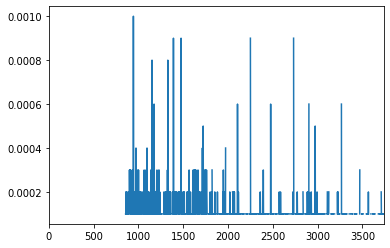

In [204]:
data_copy['Mg, %'].plot()

In [220]:
data_copy

1,Номер гильзы,Паспорт разливки плавки,Дата,"Вес заготовок, т",Марка стали полученная,ГОСТ,Плавка в серии,Сечение заготовки,Тип разливки,"Вес стали (со стенда ППС), т",...,"Pb, %","Sb, %","Mg, %","Zn, %","Сэ, %",Тип защитной трубы,Тип погружного стакана,Тип стакана дозатора п/к,Тип стопора п/к,Замечания по плавке
0,NaN,12002879.0,2020-01-05,170.188,Арм240,ГОСТ 34028-2016,6.0,150x150,Открытая,NaN,...,NaN,NaN,NaN,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0
1,NaN,12002883.0,2020-01-05,144.900,Арм240,ГОСТ 34028-2016,4.0,150x150,Открытая,NaN,...,NaN,NaN,NaN,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0
2,NaN,12002886.0,2020-01-05,168.000,Арм240,ГОСТ 34028-2016,5.0,150x150,Открытая,NaN,...,NaN,NaN,NaN,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0
3,NaN,12002888.0,2020-01-05,170.100,Ст3сп,Контракт,7.0,150x150,Открытая,NaN,...,NaN,NaN,NaN,NaN,0.329,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,Затягивание металлопровода пром.ковша на 0.4м/...
4,NaN,12002893.0,2020-01-05,163.800,Ст3сп,Контракт,12.0,150x150,Открытая,NaN,...,NaN,NaN,NaN,NaN,0.318,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,NaN,12007491.0,2020-01-10,160.368,Арм500,ГОСТ 34028-2016,2.0,180x180,Открытая,NaN,...,0.0047,NaN,0.0001,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0
3734,NaN,12007492.0,2020-01-10,166.536,Арм500,ГОСТ 34028-2016,3.0,180x180,Открытая,NaN,...,0.0046,NaN,0.0001,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0
3735,NaN,12007493.0,2020-02-10,160.368,Арм500,ГОСТ 34028-2016,4.0,180x180,Открытая,NaN,...,0.0047,NaN,NaN,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0
3736,NaN,12007494.0,2020-02-10,166.536,Арм500,ГОСТ 34028-2016,5.0,180x180,Открытая,NaN,...,0.0047,NaN,NaN,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0


In [25]:
data_copy['Дельта температуры воды, °C'].value_counts()

9.0    3633
8.0      80
6.0      22
7.0       3
Name: Дельта температуры воды, °C, dtype: int64

In [33]:
data_prikol_copy.columns = range(8)
data_prikol_copy[2].nunique()


42

In [34]:
data_prikol_copy[2]

10               Ферросиликомарганец FeMnSi18
11                        Лом стальной 3А МС1
12                  Окатыш Нефлюсованный ОН65
13                               Известь ИС-1
14                   Флюс Магнезиальный ФМИ-1
                         ...                 
62628    Материал углеродосодержащий УСМ 85-2
62629                   Флюорит кусковой ФК75
62631                        Алюмофлюс ШОК-70
62632    Материал углеродосодержащий УСМ 85-2
62633                            Известь ИС-1
Name: 2, Length: 56848, dtype: object

In [38]:
data_copy['Скорость разливки, м/мин'].value_counts()

2.0    3437
3.0     295
1.0       6
Name: Скорость разливки, м/мин, dtype: int64

#

In [41]:
data_selta_t = data_copy['Темп 1, °С'] - data_copy['Темп 2, °С']
data_selta_t.sort_values().dropna()

3113   -11.0
2361   -11.0
2634   -10.0
1807   -10.0
3547   -10.0
        ... 
3358    10.0
3361    10.0
190     10.0
1319    11.0
1439    16.0
Length: 3732, dtype: float64

In [44]:
data_copy['Вес стали расчет., т'].sort_values()

2960    126.841
19      135.828
2964    140.124
821     143.536
221     143.800
         ...   
231     181.100
1951    181.675
917     181.707
2785    185.126
1088    189.300
Name: Вес стали расчет., т, Length: 3738, dtype: float64

In [45]:
data_prikol_copy.loc[data_prikol_copy[2] == 'КК']

,0,1,2,3,4,5,6,7
10,12004614,14000135,Ферросиликомарганец FeMnSi18,2.802,Ферросиликомарганец FeMnSi18 10-50 ГОСТ 4756-91,009-01-УВЫПЛ,2.802,0
11,12004614,14002832,Лом стальной 3А МС1,31.668,Лом стальной 3А МС1 ТУ 38.32.22-009-24688283-2020,009-01-СКРАП,31.668,0
12,12004614,14002174,Окатыш Нефлюсованный ОН65,1.536,Окатыш Нефлюсованный ОН65 ТТ-ОН-001-24688283-2018,009-01-СЫПФЕР,1.536,0
13,12004614,14002114,Известь ИС-1,7.42,Известь ИС-1 ТУ 075100-004-24688283-2019,009-01-СЫПФЕР,7.42,0
14,12004614,14002131,Флюс Магнезиальный ФМИ-1,0.152,Флюс Магнезиальный ФМИ-1 ТТ 72664728-802-2017,009-01-СЫПФЕР,0.152,0
...,...,...,...,...,...,...,...,...
62628,12007462,14002127,Материал углеродосодержащий УСМ 85-2,0.15,Материал углеродосодержащий УСМ 85-2 ТУ-УСМ-00...,009-01-СЫПФЕР,0.15,0
62629,12007462,14002129,Флюорит кусковой ФК75,0.157,Флюорит кусковой ФК75 ТТ-ШОМ-001-24688283-2017,009-01-СЫПФЕР,0.157,0
62631,12007462,14002135,Алюмофлюс ШОК-70,0.211,Алюмофлюс ШОК-70 ТУ 23.20.12-013-38281237-2017,009-01-УВОС,0.211,0
62632,12007462,14002127,Материал углеродосодержащий УСМ 85-2,0.164,Материал углеродосодержащий УСМ 85-2 ТУ-УСМ-00...,009-01-УВОС,0.164,0


In [49]:
data_prikol_copy.loc[data_prikol_copy[2] == 'КК']

,0,1,2,3,4,5,6,7


In [51]:
data_prikol_copy[2].head(30)

10            Ферросиликомарганец FeMnSi18
11                     Лом стальной 3А МС1
12               Окатыш Нефлюсованный ОН65
13                            Известь ИС-1
14                Флюс Магнезиальный ФМИ-1
15    Материал углеродосодержащий УСМ 85-2
16                   Флюорит кусковой ФК75
18                Флюс Магнезиальный ФМИ-1
19                   Флюорит кусковой ФК75
20                        Алюмофлюс ШОК-70
21                            Известь ИС-1
22        ТИС для сталеразливочного ковша 
23                       Ферросилиций ФС75
24            Ферросиликомарганец FeMnSi18
25                          Проволока СК40
26    Материал углеродосодержащий УСМ 85-2
28    Материал углеродосодержащий УСМ 85-2
29                         Алюмофлюс АТФ75
30                            Известь ИС-1
31               Окатыш Нефлюсованный ОН65
32            Ферросиликомарганец FeMnSi18
33                         Лом стальной 2А
34                      Чугун передельный 
35         

In [52]:
data_prikol = pd.read_excel('data_prikol.xlsx')
data_prikol.columns = data_prikol.iloc[5]
data_prikol = data_prikol[2:-42]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [176]:
data_prikol.columns = range(8)

In [177]:
l = data_prikol[data_prikol[2] == 'КК'][[0, 3]].astype('float')
display(l)
for i in l.index:
    n = l.loc[i, 0]
    print(n)
    try:
        print(data_copy.loc[n == data_copy['Паспорт разливки плавки']] - l.loc[i, 3])
    except:
        display(data_copy.loc[n == data_copy['Паспорт разливки плавки']].index.size())
        break

,0,3


In [178]:
data_prikol[data_prikol[2] == 'КК'][3].sort_values().head(3)

Series([], Name: 3, dtype: object)

In [19]:
with pd.option_context('display.max_rows', 20,'display.max_columns', None):
    display(data_copy[data_copy['Плавка в серии'] == 1].sort_values(by='Дата').head(10))

1,Номер гильзы,Паспорт разливки плавки,Дата,"Вес заготовок, т",Марка стали полученная,ГОСТ,Плавка в серии,Сечение заготовки,Тип разливки,"Вес стали (со стенда ППС), т","Вес стали расчет., т","Вес шлака при закрытии с/к, т","Остаток металла в с/к, т","Вес разлитой стали, т","Остатки в п/к, т","Тех. обрезь, т",№ с/к,"Темп. стали в с/к, °C",№ п/к,"Стойкость гильзы кр-ра 1, т","Стойкость гильзы кр-ра 2, т","Стойкость гильзы кр-ра 3, т","Стойкость гильзы кр-ра 4, т","Стойкость гильзы кр-ра 5, т","Стойкость гильзы кр-ра 6, т","Частота качания, кол-во/мин","Ход кр-ра, мм","Скорость разливки, м/мин","Расход воды на кр-р, л/мин","Дельта температуры воды, °C","Расход воды ЗВО №1, л/мин","Расход воды ЗВО №2, л/мин","Расход воды ЗВО №3, л/мин","Брак всего, кг",Кол-во НЛЗ 1 ручей,Кол-во НЛЗ 2 ручей,Кол-во НЛЗ 3 ручей,Кол-во НЛЗ 4 ручей,Кол-во НЛЗ 5 ручей,Кол-во НЛЗ 6 ручей,Марка,"Кол-во, т",Время 1 замера,"Темп 1, °С",Время 2 замера,"Темп 2, °С",Время пробы МНЛЗ,"C, %","Si, %","Mn,%","S, %","P, %","Cr, %","Ni, %","Cu, %","As, %","Mo, %","Nb, %","Sn, %","Ti, %","V, %","Al, %","Ca, %","N, %","W, %","Bi, %","Pb, %","Sb, %","Mg, %","Zn, %","Сэ, %",Тип защитной трубы,Тип погружного стакана,Тип стакана дозатора п/к,Тип стопора п/к,Замечания по плавке
172,NaN,12002880.0,2020-01-05,159.600,Арм240,ГОСТ 34028-2016,1.0,150x150,Открытая,NaN,160.600,1.8,0.4,160.200,27.0,NaN,3.0,1583.0,5.0,4710.0,3009.0,1559.0,3236.0,2742.0,2569.0,180.0,9.0,2.0,1950.0,9.0,260.0,320.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B 789/BC,0.15,2020-10-21 10:50:00,1550.0,2020-10-21 10:50:00,1548.0,2020-10-21 11:01:22,0.1856,0.1380,0.5010,0.0018,0.0131,0.0273,0.0191,0.0243,0.0015,0.0017,0.0005,0.0004,0.0006,0.0019,0.0028,0.0009,0.0058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0
171,NaN,12002881.0,2020-01-05,157.449,Арм240,ГОСТ 34028-2016,1.0,150x150,Закрытая,NaN,158.449,1.8,0.4,158.049,0.0,NaN,12.0,1584.0,4.0,NaN,2957.0,1506.0,3184.0,2689.0,2518.0,165.0,10.0,3.0,1950.0,8.0,210.0,250.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B 789/BC,0.12,2020-10-21 06:43:00,1555.0,2020-10-21 06:43:00,1550.0,2020-10-21 06:53:49,0.1842,0.1549,0.5013,0.0023,0.0073,0.0260,0.0149,0.0236,0.0014,0.0014,0.0005,0.0002,0.0006,0.0018,0.0025,0.0009,0.0048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RHI DELTEK D99,RHI DELTEK D99Z98,RHI DELTEK D99WX08,RHI DELTEK A100WX08,1 ручей Отказ привода стопора.
1810,NaN,12005568.0,2020-01-08,162.816,Арм500,ГОСТ 34028-2016,1.0,180x180,Открытая,NaN,164.495,1.8,0.4,164.095,0.0,NaN,4.0,1579.0,2.0,8856.0,8639.0,3201.0,9135.0,3364.0,3699.0,200.0,7.0,2.0,2155.0,9.0,320.0,350.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B 789/BC,0.06,2020-10-21 11:30:00,1549.0,2020-10-21 11:30:00,1545.0,2020-10-21 11:41:27,0.1974,0.1718,0.6909,0.0038,0.0165,0.0571,0.0198,0.0415,0.0012,0.0039,0.0003,NaN,0.0009,0.0021,0.0028,0.0011,0.0067,NaN,NaN,0.0030,NaN,0.0001,0.0020,0.329,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0
2781,NaN,12006539.0,2020-01-09,155.648,1015,ASTM A510/A510M-18,1.0,180x180,Открытая,NaN,157.290,1.8,0.4,156.890,0.0,NaN,12.0,1597.0,7.0,11322.0,3366.0,4351.0,3386.0,5963.0,3384.0,175.0,7.0,2.0,2150.0,8.0,270.0,300.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B 789/BC,0.08,2020-10-21 08:35:00,1559.0,2020-10-21 08:35:00,1550.0,2020-10-21 08:51:22,0.1600,0.1667,0.6058,0.0208,0.0156,0.0186,0.0137,0.0510,0.0012,0.0020,0.0004,NaN,0.0007,0.0024,0.0021,0.0013,0.0123,NaN,NaN,0.0038,NaN,NaN,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0
3732,NaN,12007490.0,2020-01-10,157.284,Арм500,ГОСТ 34028-2016,1.0,180x180,Открытая,NaN,159.030,1.8,0.4,158.630,0.0,NaN,6.0,1581.0,6.0,13446.0,10064.0,8063.0,8049.0,9568.0,12870.0,200.0,7.0,2.0,2155.0,9.0,320.0,350.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B 789/BC,0.08,2020-10-21 22:20:00,1547.0,2020-10-21 22:20:00,1543.0,2020-10-21 22:23:26,0.1927,0.1450,0.4760,0.0088,0.0126,0.0490,0.0213,0.0423,0.0010,0.0022,0.0003,NaN,0.0010,0.0011,0.0025,0.0034,0.0086,NaN,NaN,0.0047,NaN,0.0001,NaN,NaN,RHI DELTEK D99,0,RHI JUSTAL DS1015,0,0
167,NaN,12002906.0,2020-02-05,163.296,Арм500,ГОСТ 34028-2016,1.0

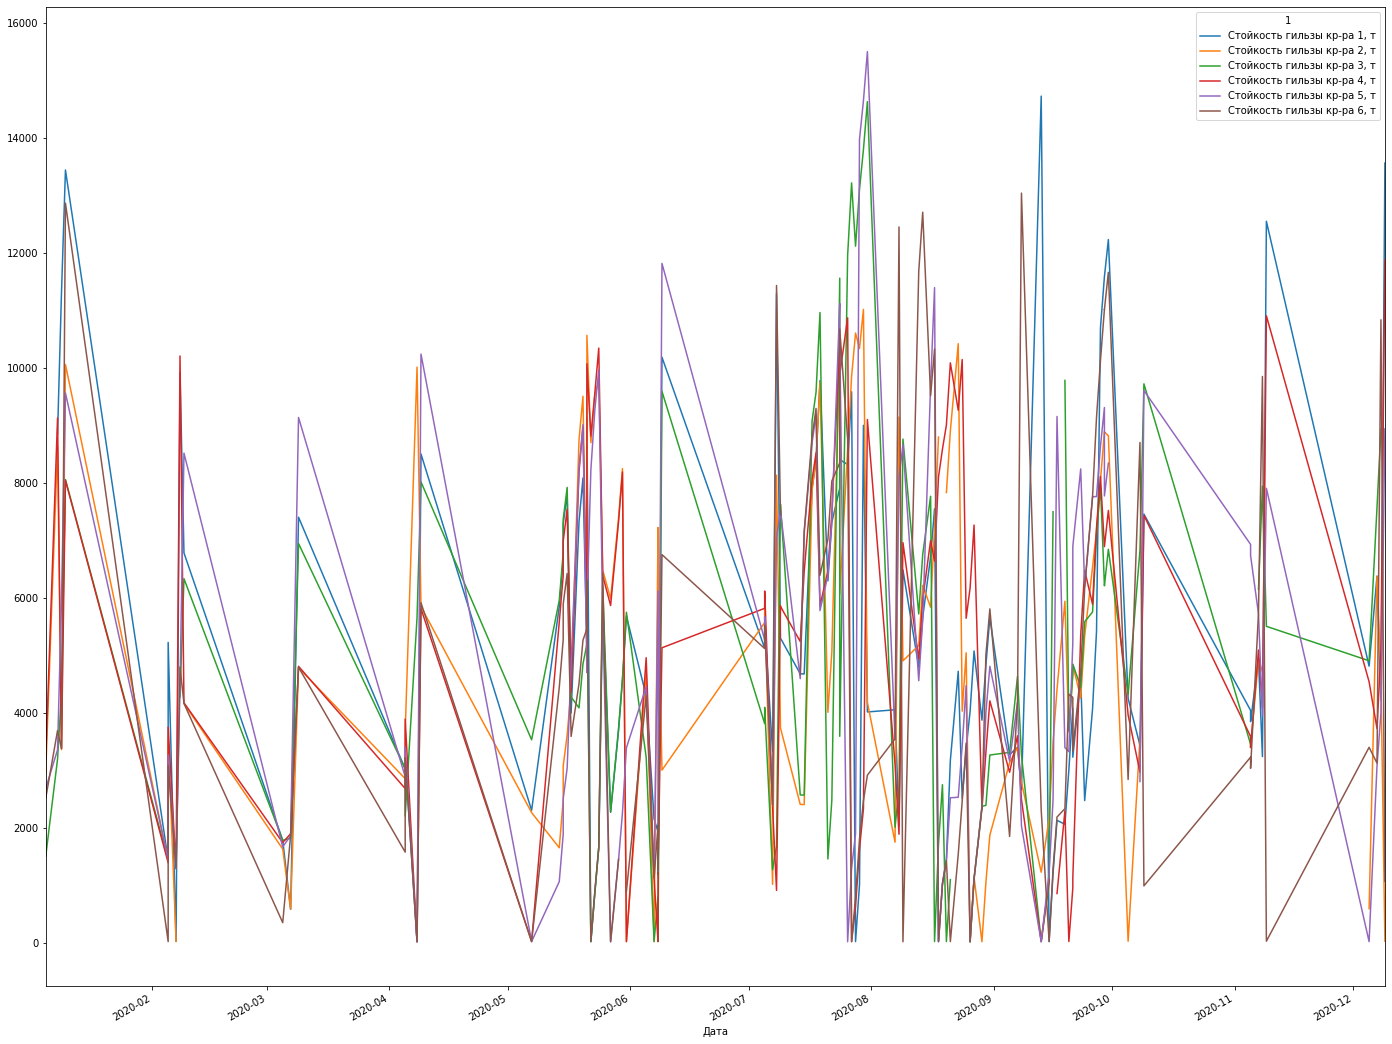

In [46]:
data_copy[data_copy['Плавка в серии'] == 1].sort_values(by='Дата')\
[[f'Стойкость гильзы кр-ра {t}, т' for t in range(1, 7)] + ['Дата']].plot(x='Дата', figsize=(24, 20))

In [174]:
data_copy[data_copy['Плавка в серии'] == 1].sort_values(by='Дата')\
[[f'Стойкость гильзы кр-ра {t}, т' for t in range(1, 7)] + ['Дата']].dropna().head(5)

1,"Стойкость гильзы кр-ра 1, т","Стойкость гильзы кр-ра 2, т","Стойкость гильзы кр-ра 3, т","Стойкость гильзы кр-ра 4, т","Стойкость гильзы кр-ра 5, т","Стойкость гильзы кр-ра 6, т",Дата
172,4710.0,3009.0,1559.0,3236.0,2742.0,2569.0,2020-01-05
1810,8856.0,8639.0,3201.0,9135.0,3364.0,3699.0,2020-01-08
2781,11322.0,3366.0,4351.0,3386.0,5963.0,3384.0,2020-01-09
3732,13446.0,10064.0,8063.0,8049.0,9568.0,12870.0,2020-01-10
167,1447.0,1441.0,1441.0,1398.0,1453.0,27.0,2020-02-05


In [64]:
data_copy.describe()[[f'Стойкость гильзы кр-ра {t}, т' for t in range(1, 7)]]

1,"Стойкость гильзы кр-ра 1, т","Стойкость гильзы кр-ра 2, т","Стойкость гильзы кр-ра 3, т","Стойкость гильзы кр-ра 4, т","Стойкость гильзы кр-ра 5, т","Стойкость гильзы кр-ра 6, т"
count,3730.000000,3635.000000,3634.000000,3673.000000,3718.000000,3.730000e+03
mean,5711.218767,5898.692985,5478.534673,5712.760686,5633.689618,7.336251e+03
std,3333.096737,3461.054169,3436.859483,3160.998347,3559.317643,1.387688e+05
min,25.000000,25.000000,25.000000,9.000000,25.000000,2.400000e+01
25%,3324.250000,3523.000000,2746.250000,3105.000000,2718.000000,1.976000e+03
50%,5211.000000,5728.000000,5109.000000,5979.000000,5193.000000,4.306500e+03
75%,7977.750000,8662.500000,7683.750000,7884.000000,8409.750000,7.390500e+03
max,17731.000000,100097.000000,16425.000000,12759.000000,18863.000000,8.473135e+06


In [62]:
data_copy['Стойкость гильзы кр-ра 6, т'].dropna().sort_values()

807          24.0
775          24.0
3003         25.0
2586         25.0
1667         25.0
          ...    
2098      13695.0
2099      13722.0
2100      13750.0
988      273270.0
848     8473135.0
Name: Стойкость гильзы кр-ра 6, т, Length: 3730, dtype: float64

In [66]:
sum(data_copy[[f'Стойкость гильзы кр-ра {t}, т' for t in range(1, 7)]].dropna())

TypeError: unsupported operand type(s) for +: 'int' and 'str'

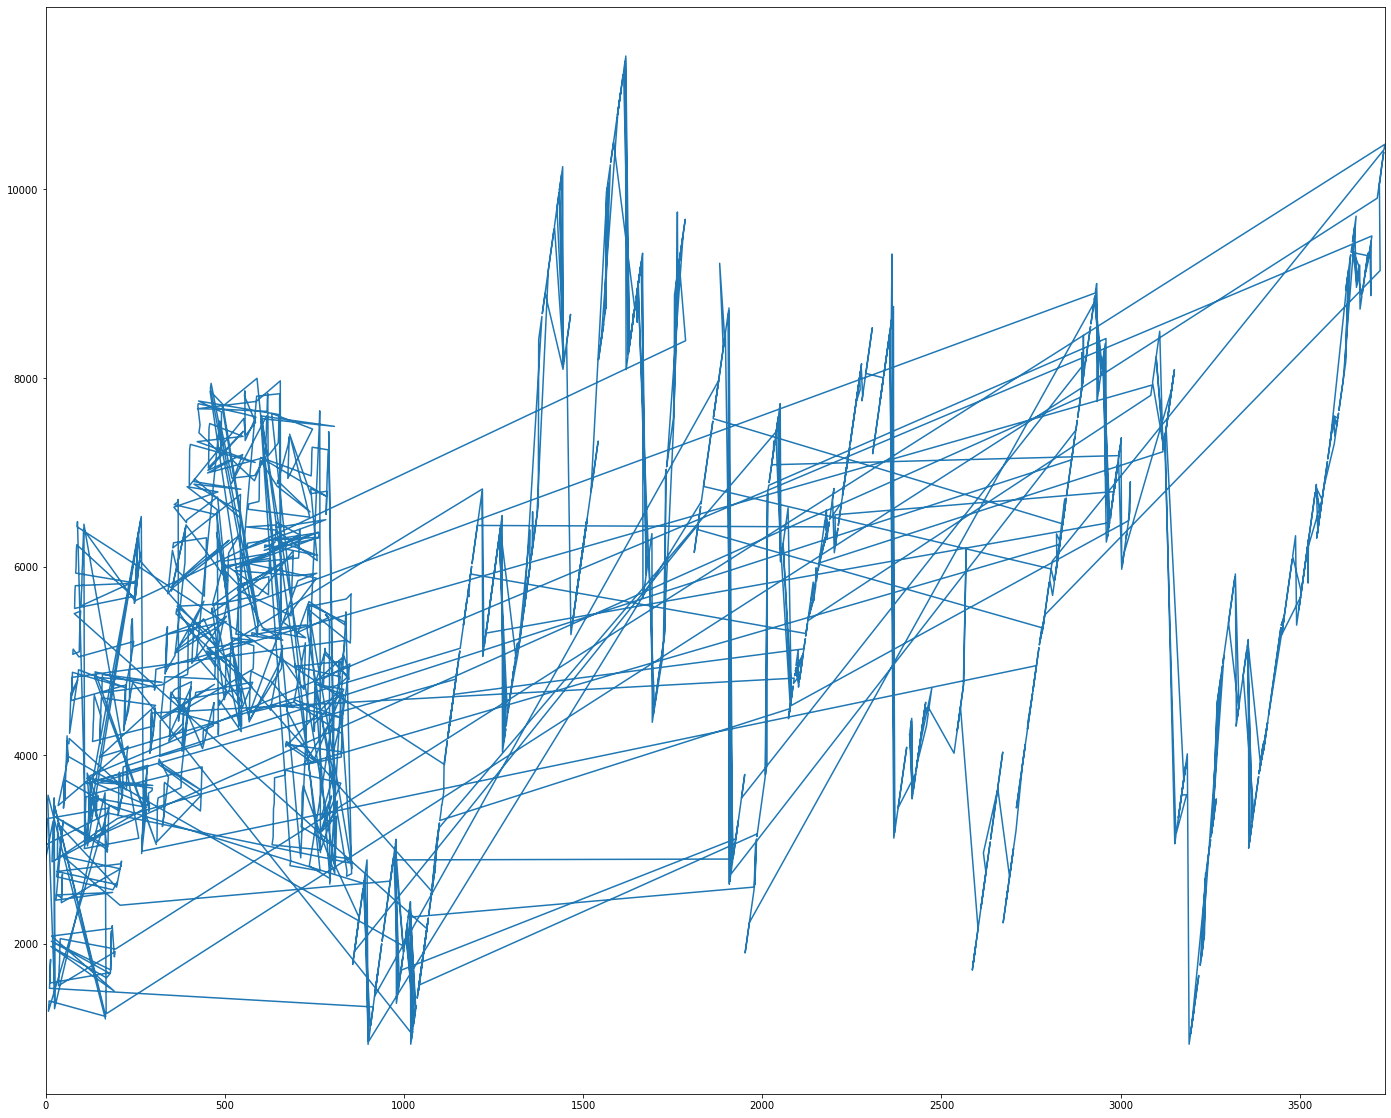

In [173]:
data_mean_mold = (data_copy['Стойкость гильзы кр-ра 1, т'] + data_copy['Стойкость гильзы кр-ра 2, т'] + \
data_copy['Стойкость гильзы кр-ра 3, т'] + data_copy['Стойкость гильзы кр-ра 4, т'] + \
data_copy['Стойкость гильзы кр-ра 5, т'] + data_copy['Стойкость гильзы кр-ра 6, т']) // 6

data_mean_mold = pd.DataFrame(data={'Среднее': data_mean_mold, 'Дата': data_copy['Дата']})
data_mean_mold = data_mean_mold.dropna()
data_mean_mold = data_mean_mold.sort_values(by='Дата')
for _ in range(3):
    index_of_outler = data_mean_mold[data_mean_mold['Среднее'] == data_mean_mold['Среднее'].max()].index[0]
    data_mean_mold = data_mean_mold.drop(index=index_of_outler)
data_mean_mold['Среднее'].plot(figsize=(24, 20))
data_mean_mold.index = data_mean_mold['Дата']

In [84]:
data_copy[[f'Стойкость гильзы кр-ра {t}, т' for t in range(1, 7)]]

1,"Стойкость гильзы кр-ра 1, т","Стойкость гильзы кр-ра 2, т","Стойкость гильзы кр-ра 3, т","Стойкость гильзы кр-ра 4, т","Стойкость гильзы кр-ра 5, т","Стойкость гильзы кр-ра 6, т"
0,NaN,2925.0,1475.0,3152.0,2658.0,2487.0
1,4790.0,3091.0,1639.0,3316.0,2822.0,2646.0
2,4817.0,3118.0,1666.0,3345.0,2849.0,2676.0
3,4874.0,3175.0,1718.0,3400.0,2906.0,2730.0
4,5010.0,3315.0,1853.0,3536.0,3048.0,2869.0
...,...,...,...,...,...,...
3733,13474.0,10092.0,8088.0,8074.0,9596.0,12898.0
3734,13505.0,10116.0,8113.0,8098.0,9627.0,12929.0
3735,13530.0,10144.0,8140.0,8126.0,9651.0,12957.0
3736,13557.0,10172.0,8168.0,8157.0,9679.0,12981.0


In [95]:
data_copy['Стойкость гильзы кр-ра 6, т'].max()

8473135.0

In [98]:
data_copy[data_copy['Стойкость гильзы кр-ра 6, т'] == 8473135.0].index[0]

848